In [1]:
import numpy as np
import time
import stock
import kline
import choose

In [2]:
def K(code):
    c,k,d = stock.loadKline(code)
    
    macdR = choose.macdRange(k)
    #扩大一个，并且放置向前溢出
    macdR[:,0]-=1
    if macdR[0,0]<0:
        macdR[0,0] = 0 
    pt = choose.intersectionIndexs([
        choose.rangeToIndexs(macdR),
        choose.rangeToIndexs(choose.bollSelectRange(k,20,0.18,15)),
        choose.volumeMaIndexs(k,1.5,20),
        choose.priceMaIndexs(k,20),
        choose.priceGrowIndexs(k)
    ])
    pt = choose.rangeFirstIndexs(macdR,pt,len(k))    
    
    bwi = choose.rangeToIndexs(choose.bollSelectRange(k,20,0.18,15))
    bw = np.zeros((len(k)))               
    bw[bwi] = 0.2
                               
    kline.Plote(code,'d',config={
    'boll':20,
    'macd':False,
    'vlines':[
        {
            'x':pt,
            'linewidth':2,
            'color':'red',
            'linestyle':'-.'
        }
    ],
    'figure':[
        [{
        'data':bw,
        'color':'blue'
        }]
    ]
    }).show()

In [3]:
K('SH:600460')

Box(children=(Button(description='上一页', style=ButtonStyle()), Button(description='下一页', style=ButtonStyle()), …

Output()

In [4]:
def compareMacdAndBollMa20Plot(code):
    c,k,d = stock.loadKline(code)
    macdR = choose.macdRange(k)
    #扩大一个，并且放置向前溢出
    macdR[:,0]-=1
    if macdR[0,0]<0:
        macdR[0,0] = 0 
    buy = choose.intersectionIndexs([
        choose.rangeToIndexs(macdR),
        choose.rangeToIndexs(choose.bollSelectRange(k,20,0.18,20)),
        choose.volumeMaIndexs(k,2,20),
        choose.priceMaIndexs(k,20),
        choose.priceGrowIndexs(k)
    ])
    ma20 = stock.maK(k,20)
    sell = choose.argWhere(k[:,4]<ma20)
    t0 = choose.buySellMatch(buy,sell)
    
    macd = choose.macdRange(k)
    t1 = choose.buySellMatch(macd[:,0],macd[:,1])
    
    choose.analysisBuySell(c,k,[t0,t1])

1.0874534233264066 0.4230769230769231
1.0332553352608709 0.4014084507042254
1.0768335199411174 0.6153846153846154


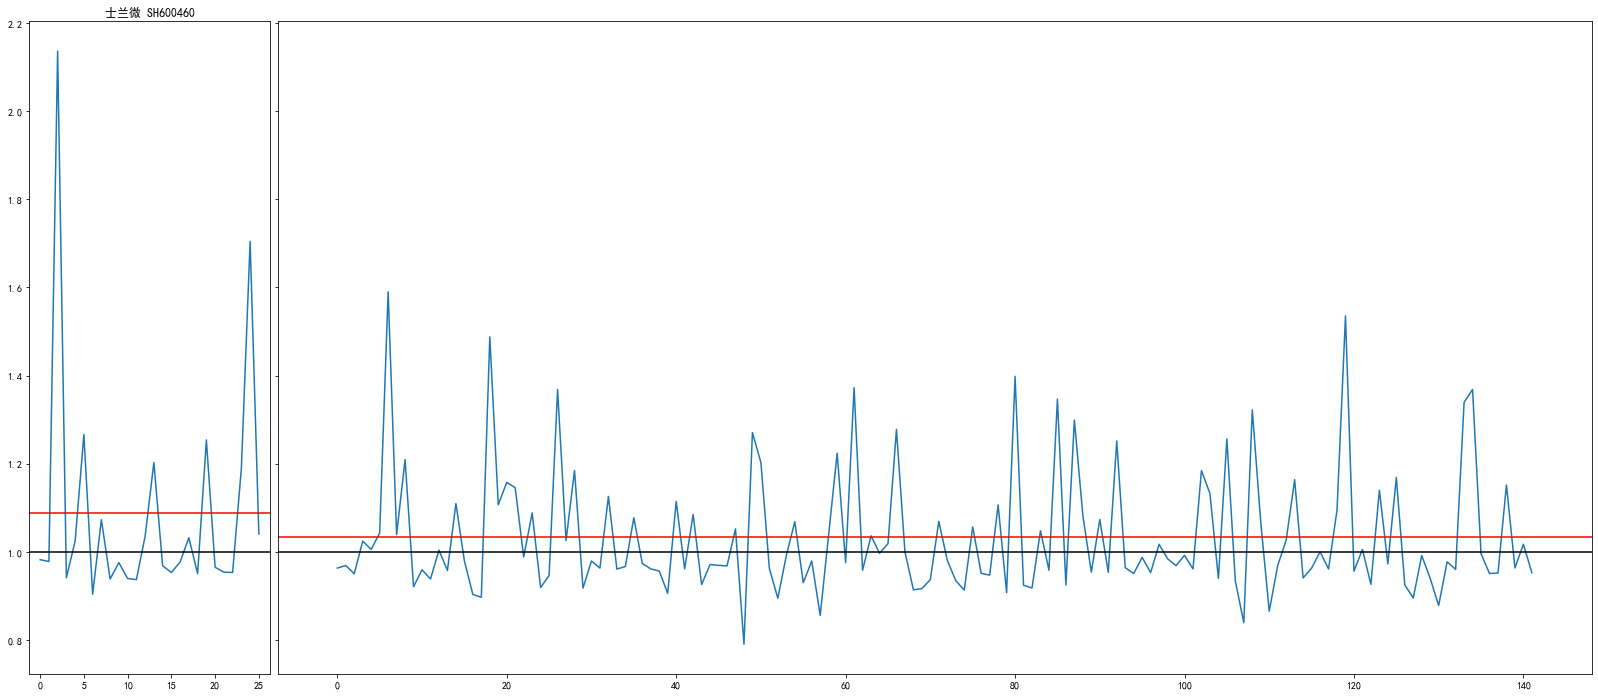

In [5]:
compareMacdAndBollMa20Plot('SH:600460')